## **Importe das bibliotecas**

In [10]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

# Análise dos Dados de Teste
- Dos passos anteriores que realizamos para os dados do treino:
    - Estudo das variáveis que influenciam no preço da casa via Coeficiente de Correlação
    - Análise dos dados Faltantes (para seleção de atributos)
    - Seleção de Atributos via Coeficiente de Correlação
    - Detecção de Outliers
- Para os dados de teste:
    - é necessário remover os atributos que foram removidos do conjunto de treino

In [11]:
test = pd.read_csv('test_house_prices.csv')

In [12]:
print(test.shape)
data_test = pd.DataFrame(test)

low_corr_coeff = [ 'Id' , 'MSSubClass' , 'OverallCond' , 'BsmtFinSF2' ,
'LowQualFinSF' , 'BsmtHalfBath' , 'BedroomAbvGr' , 'KitchenAbvGr' ,
'EnclosedPorch' , '3SsnPorch' , 'ScreenPorch' , 'PoolArea' , 'MiscVal' ,
                  'MoSold' , 'YrSold' , 'BsmtUnfSF' , 'LotArea' , 
                  'HalfBath' , 'BsmtFullBath']
test = test.drop(test[low_corr_coeff], axis = 1)
print(test.shape)

null_columns = [ 'PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu']
test = test.drop(test[null_columns], axis = 1)
print(test.shape)

(1459, 80)
(1459, 61)
(1459, 56)


- Para treino e teste:
    - Primeiro, transformar os atributos numéricos com alto desvio: log (valor do atributo + 1) - isso tornará a distribuição dos valores mais perto da distribuição normal
    - Criar variáveis Dummy para os atributos categóricos
    - Substitua os valores numéricos faltantes (NaN's) pela média de suas respectivas colunas

In [13]:
%store -r train #utiliza a variavel train que vem do notebook 2

y= pd.DataFrame(train['SalePrice'])
train = pd.DataFrame(train.drop('SalePrice', axis=1)) #axis=1 estamos removendo a coluna e não linha

all_data = pd.concat([train,test])
all_data.shape


no stored variable #utiliza a variavel train que vem do notebook 2


(2915, 56)

In [14]:
all_data.describe()

,1stFlrSF,2ndFlrSF,BsmtFinSF1,Fireplaces,FullBath,GarageArea,GarageCars,GarageYrBlt,GrLivArea,LotFrontage,MasVnrArea,OpenPorchSF,OverallQual,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd
count,2915.000000,2915.000000,2914.000000,2915.000000,2915.000000,2914.000000,2914.000000,2756.000000,2915.000000,2430.000000,2892.000000,2915.000000,2915.000000,2915.000000,2914.000000,2915.000000,2915.000000,2915.000000
mean,1157.229846,336.091938,438.919012,0.595883,1.567410,471.791352,1.764928,1978.082003,1498.022642,69.168724,101.646611,47.281647,6.086449,6.447341,1048.918325,93.543053,1971.278902,1984.242882
std,384.951811,428.176095,444.059991,0.644908,0.552496,213.392380,0.760322,25.573732,496.971712,22.788906,178.529425,67.131617,1.406209,1.564520,428.842825,126.402329,30.289148,20.893691
min,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1895.000000,334.000000,21.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,1872.000000,1950.000000
25%,876.000000,0.000000,0.000000,0.000000,1.000000,320.000000,1.000000,1960.000000,1125.500000,59.000000,0.000000,0.000000,5.000000,5.000000,793.000000,0.000000,1953.000000,1965.000000
50%,1082.000000,0.000000,368.000000,1.000000,2.000000,479.500000,2.000000,1979.000000,1442.000000,68.000000,0.000000,26.000000,6.000000,6.000000,988.000000,0.000000,1973.000000,1993.000000
75%,1383.500000,704.000000,732.750000,1.000000,2.000000,576.000000,2.000000,2002.000000,1743.000000,80.000000,164.000000,70.000000,7.000000,7.000000,1301.500000,168.000000,2001.000000,2004.000000
max,5095.000000,2065.000000,4010.000000,4.000000,4.000000,1488.000000,5.000000,2207.000000,5095.000000,313.000000,1600.000000,742.000000,10.000000,15.000000,5095.000000,1424.000000,2010.000000,2010.000000


In [15]:
#log transform the target:
y = np.log1p(y)

Skew: 0.123044


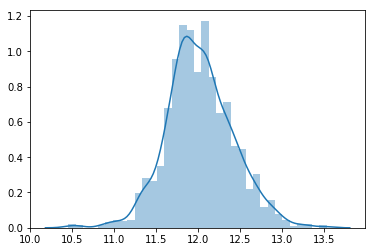

In [16]:
sns.distplot(y);
print("Skew: %f" % y.skew())

In [17]:
#log transform skewed numeric features:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

from scipy.stats import skew
skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index

all_data[skewed_feats] = np.log1p(all_data[skewed_feats])

In [18]:
all_data = pd.get_dummies(all_data)

In [19]:
#filling NA's with the mean of the column:
all_data = all_data.fillna(all_data.mean())

In [20]:
all_data.describe()

,1stFlrSF,2ndFlrSF,BsmtFinSF1,Fireplaces,FullBath,GarageArea,GarageCars,GarageYrBlt,GrLivArea,LotFrontage,...,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Grvl,Street_Pave,Utilities_AllPub,Utilities_NoSeWa
count,2915.000000,2915.000000,2915.000000,2915.000000,2915.000000,2915.000000,2915.000000,2915.000000,2915.000000,2915.000000,...,2915.000000,2915.000000,2915.000000,2915.000000,2915.000000,2915.000000,2915.000000,2915.000000,2915.000000,2915.000000
mean,7.002984,2.828597,4.224168,0.595883,1.567410,471.791352,1.764928,1978.082003,7.260454,4.195092,...,0.008919,0.003087,0.002744,0.080961,0.002401,0.865866,0.004117,0.995883,0.998971,0.000343
std,0.320880,3.276520,2.979545,0.644908,0.552496,213.355762,0.760192,24.866241,0.323141,0.318906,...,0.094036,0.055489,0.052324,0.272821,0.048953,0.340854,0.064040,0.064040,0.032070,0.018522
min,5.814131,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1895.000000,5.814131,3.091042,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.776507,0.000000,0.000000,0.000000,1.000000,320.000000,1.000000,1961.000000,7.026871,4.110874,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
50%,6.987490,0.000000,5.910797,1.000000,2.000000,479.000000,2.000000,1978.082003,7.274480,4.195092,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
75%,7.233094,6.558198,6.597827,1.000000,2.000000,576.000000,2.000000,2001.000000,7.463937,4.369448,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,8.536211,7.633370,8.296796,4.000000,4.000000,1488.000000,5.000000,2207.000000,8.536211,5.749393,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


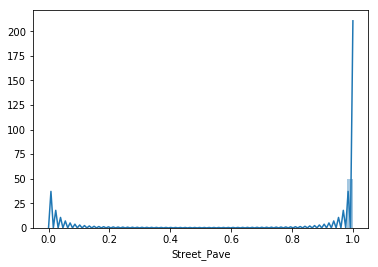

In [21]:
sns.distplot(all_data['Street_Pave']);


In [22]:
#creating matrices for sklearn:
X_train = all_data[:train.shape[0]] #devolve as linhas de train
X_test = all_data[train.shape[0]:] #devolve as linhas de teste

### Caso queira realizar a submissão na ferramenta Kaggle: utilizar X_test -- Voltaremos em breve...

# Uso de Regressão Linear para criação do modelo

In [28]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [29]:
regr = linear_model.LinearRegression()

In [31]:
# 70% dos dados de treino para construir o modelo
X_realdata_train = X_train[:1019] 
y_realdata_train = y[:1019]

# 30% dos dados do treino para realizar um comparativo entre o valor real e o predito pelo modelo
X_realdata_test = X_train[1019:]
y_realdata_test = y[1019:]

print(X_realdata_train.shape, y_realdata_train.shape, X_realdata_test.shape, y_realdata_test.shape)

((1019, 251), (1019, 1), (437, 251), (437, 1))


- Treinando o modelo com os 70% dos dados de treino


In [32]:
regr.fit(X_realdata_train, y_realdata_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

- Renomeando a coluna de Y que foi predita pelo modelo

In [33]:
y_pred = pd.DataFrame(regr.predict(X_realdata_test))
y_pred.columns = ['SalePrice']

<img src="score.png">

### Principais métricas de avaliação de modelos de Regressão

- O Mean Absolute Error (or MAE), isto é, o erro médio absoluto é a soma das diferenças absolutas entre o valor real e o valor predito. Esta métrica dá uma ideia de quão errado é a predição. 

- O Mean Squared Error (or MSE), isto é, o erro quadrático médio é semelhante ao MAE, provendo (a grosso modo) a magnitude do erro. 

- O R^2 (or R Squared) é uma métrica que oferece uma indicação de quão bom uma conjunto de predições se adequa ao valor real. 

In [40]:
# Os coeficientes
#print('Coefficients: \n', regr.coef_)
# Mean square error
print("Mean absolute error: %.5f"
      % mean_absolute_error(y_pred, y_realdata_test))
print("Mean squared error: %.5f"
      % mean_squared_error(y_pred, y_realdata_test))
# Variance score ou quadrado do coeficiente de correlação
print('R squared: %.5f' % r2_score(y_pred, y_realdata_test)) #quanto mais próximo de 1, melhor a predição

Mean absolute error: 0.08864
Mean squared error: 0.01557
R squared: 0.88963


### Comparativo entre os valores de Y real e os preditos pelo modelo

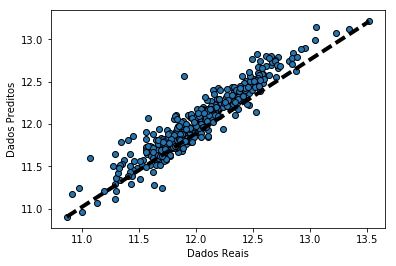

In [37]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
plt.scatter(y_realdata_test, y_pred,edgecolors=(0, 0, 0))
ax.plot([y_realdata_test.min(), y_realdata_test.max()], [y_pred.min(), y_pred.max()], 'k--', lw=4)
ax.set_xlabel('Dados Reais')
ax.set_ylabel('Dados Preditos')
plt.show()


## Se desejar fazer a submissão deste modelo no kaggle

In [39]:
prediction = pd.DataFrame(regr.predict(X_test))
submission = pd.DataFrame()
submission['Id']= data_test.Id
submission['SalePrice'] = prediction
submission.to_csv("kaggle_house_price.csv", index=False)